In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,NaN,130.0,322.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,NaN,172.0,199.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	28
float64		column 2	28
float64		column 3	72
float64		column 4	28
float64		column 5	28
float64		column 6	14
float64		column 7	44
float64		column 8	44
float64		column 9	72
float64		column 10	98
float64		column 11	100
float64		column 12	58
float64		column 13	70


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,242.000000,242.000000,198.000000,242.000000,242.000000,256.000000,226.000000,226.000000,198.000000,172.000000,170.000000,212.000000,200.000000
mean,0.673554,54.384298,3.131313,131.107438,249.975207,0.144531,1.026549,150.265487,0.313131,1.002326,1.570588,0.594340,4.685000
std,0.469885,9.159096,0.946771,17.907462,52.442177,0.352316,0.997420,23.947727,0.464943,1.123744,0.623281,0.862909,1.937666
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,47.250000,3.000000,120.000000,213.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,155.000000,0.000000,0.650000,1.500000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,282.000000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,7.000000


<AxesSubplot:>

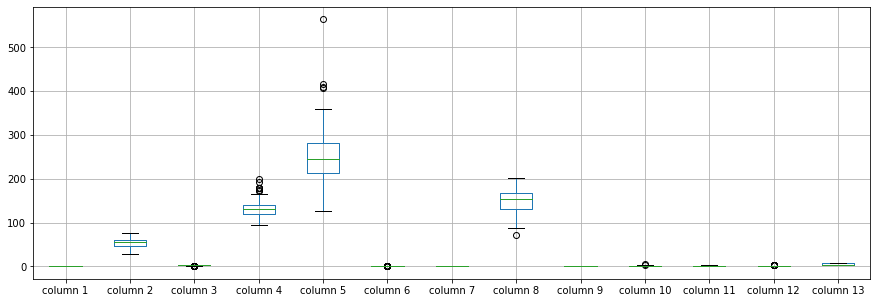

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.673554
column 2      54.384298
column 3       3.131313
column 4     131.107438
column 5     249.975207
column 6       0.144531
column 7       1.026549
column 8     150.265487
column 9       0.313131
column 10      1.002326
column 11      1.570588
column 12      0.594340
column 13      4.685000
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.108868,0.027489,-0.122232,-0.210720,0.021559,0.090196,-0.050360,0.180671,0.081528,0.077499,0.159899,0.396060
column 2,-0.108868,1.000000,0.111630,0.261925,0.233706,0.139841,0.088101,-0.411178,0.105940,0.146324,0.125156,0.314211,0.106837
column 3,0.027489,0.111630,1.000000,0.004688,0.085115,-0.059908,0.038585,-0.284883,0.368582,0.111674,0.037725,0.182004,0.235071
column 4,-0.122232,0.261925,0.004688,1.000000,0.184965,0.145752,0.036787,0.005153,0.092985,0.233649,0.107771,0.052112,0.055177
column 5,-0.210720,0.233706,0.085115,0.184965,1.000000,0.081459,0.201380,0.001069,0.082459,0.042429,-0.087289,0.065311,0.065022
column 6,0.021559,0.139841,-0.059908,0.145752,0.081459,1.000000,0.131951,0.030013,-0.036640,-0.024495,0.000600,0.144154,0.051947
column 7,0.090196,0.088101,0.038585,0.036787,0.201380,0.131951,1.000000,-0.019613,0.138701,0.003986,0.085665,0.071589,-0.035133
column 8,-0.050360,-0.411178,-0.284883,0.005153,0.001069,0.030013,-0.019613,1.000000,-0.388929,-0.315634,-0.339999,-0.247269,-0.256505
column 9,0.180671,0.105940,0.368582,0.092985,0.082459,-0.036640,0.138701,-0.388929,1.000000,0.220437,0.125817,0.201874,0.257349
column 10,0.081528,0.146324,0.111674,0.233649,0.042429,-0.024495,0.003986,-0.315634,0.220437,1.000000,0.489422,0.159632,0.314110


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+112,13+112+112,13+112+112+112,13+112+112+112+112,13+112+112+112+112+112,13+112+112+112+112,13+112+112+112,13+112+112,13+112,13], vae_layer = False, seed = 112)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 534.9744548797607
Epoch: 1 , loss: 535.936695098877
Epoch: 2 , loss: 536.9614295959473
Epoch: 3 , loss: 537.6374988555908
Epoch: 4 , loss: 534.2418117523193
Epoch: 5 , loss: 535.2610626220703
Epoch: 6 , loss: 536.1767635345459
Epoch: 7 , loss: 535.5652141571045
Epoch: 8 , loss: 535.8850345611572
Epoch: 9 , loss: 531.9438934326172
Epoch: 10 , loss: 535.1771068572998
Epoch: 11 , loss: 528.0132427215576
Epoch: 12 , loss: 526.2269306182861
Epoch: 13 , loss: 522.6790542602539
Epoch: 14 , loss: 519.7066440582275
Epoch: 15 , loss: 512.7821731567383
Epoch: 16 , loss: 500.0661201477051
Epoch: 17 , loss: 488.951940536499
Epoch: 18 , loss: 479.77742767333984
Epoch: 19 , loss: 460.2303886413574
Epoch: 20 , loss: 451.4013156890869
Epoch: 21 , loss: 430.68452644348145
Epoch: 22 , loss: 435.37245750427246
Epoch: 23 , loss: 415.6228084564209
Epoch: 24 , loss: 397.5496292114258
Epoch: 25 , loss: 390.2369022369385
Epoch

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,-1.664162,0.0,0.0,-0.155511,0.0,-17.055244,0.0,-1.511703,-0.582822,-2.951102,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.433647,0.0,0.0,-0.834399,0.0,-3.611160,0.0,0.341760,0.308715,0.899455,0.0
266,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
267,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
268,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(969.9067272826373, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.17912300637431505

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,2.335838,130.0,322.0,-0.155511,2.0,91.944756,0.0,0.888297,1.417178,0.048898,3.0
1,0.0,67.0,3.000000,115.0,564.0,0.000000,2.0,160.000000,0.0,1.600000,2.000000,0.000000,7.0
2,1.0,57.0,2.000000,124.0,261.0,0.000000,0.0,141.000000,0.0,0.300000,1.000000,0.000000,7.0
3,1.0,64.0,4.000000,128.0,263.0,0.000000,0.0,105.000000,1.0,0.200000,2.000000,1.000000,7.0
4,0.0,74.0,2.000000,120.0,269.0,0.000000,2.0,121.000000,1.0,0.200000,1.000000,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.433647,172.0,199.0,0.165601,0.0,158.388840,0.0,0.841760,1.308715,0.899455,7.0
266,1.0,44.0,2.000000,120.0,263.0,0.000000,0.0,173.000000,0.0,0.000000,1.000000,0.000000,7.0
267,0.0,56.0,2.000000,140.0,294.0,0.000000,2.0,153.000000,0.0,1.300000,2.000000,0.000000,3.0
268,1.0,57.0,4.000000,140.0,192.0,0.000000,0.0,148.000000,0.0,0.400000,2.000000,0.000000,6.0


In [21]:
imputations[-1].to_excel("Sheart_AW_20(imp).xlsx", index=False, header=False)